In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
train_dir = Path("_data/2021-05-14")
train_dfs = list(train_dir.glob("*train.csv.zip"))
print(train_dfs)
out_dfs = []
for k, train_df in enumerate(train_dfs):
    out_df = pd.read_csv(train_df)
    out_dfs.append(out_df)
out_df = pd.concat(out_dfs)

[PosixPath('_data/2021-05-14/0-train.csv.zip'), PosixPath('_data/2021-05-14/1-train.csv.zip'), PosixPath('_data/2021-05-14/2-train.csv.zip'), PosixPath('_data/2021-05-14/3-train.csv.zip')]


/mnt/ws/home/sshah/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
print(out_df)

In [ ]:
out_df = out_df.iloc[1:]

In [ ]:
sorted(list(out_df.columns))

In [ ]:
out_df.describe()

In [10]:
df = out_df

In [ ]:
fig, ax = plt.subplots()
# ax.set_yscale("log", basey=2)
# ax.set_xlim(0, 0.2e7)

for i in out_dfs:
    print(i.damper.unique())
    
# out_dfs[0].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)
# out_dfs[1].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)
out_dfs[2].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)
# out_dfs[3].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)

In [4]:
out_df.damper.unique()

array(['adagrad', 'geodamp', 'radadamp', 'geodamplr'], dtype=object)

<ipython-input-5-510aa8b5cfeb>:2: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=2)


(1e-06, 1)

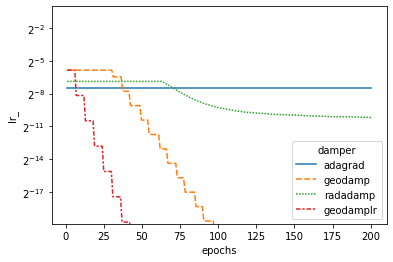

In [5]:
ax = sns.lineplot(x="epochs", y="lr_", hue="damper", data=df, ci=None, style="damper")
ax.set_yscale("log", basey=2)
ax.set_ylim(1e-6, 1)

<ipython-input-6-0d017a502213>:2: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=2)


(0.0, 15000.0)

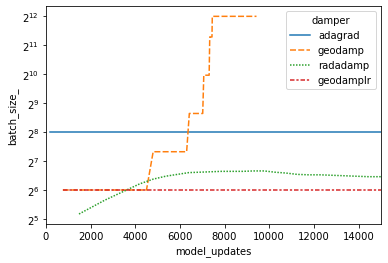

In [6]:
ax = sns.lineplot(x="model_updates", y="batch_size_", hue="damper", data=df, ci=None, style="damper")
ax.set_yscale("log", basey=2)
ax.set_xlim(0, 15000)
# ax.set_ylim(2**-20, 2**-4)

In [ ]:
ax = sns.lineplot(x="epochs", y="damping", hue="damper", data=df, ci=None, style="damper")
ax.set_yscale("log", basey=2)

In [ ]:
ax = sns.lineplot(x="model_updates", y="lr_", hue="damper", data=df, ci=None, style="damper")
ax.set_yscale("log", basey=2)
ax.set_xlim(0, 20000)
ax.set_ylim(2**-20, 2**-4)

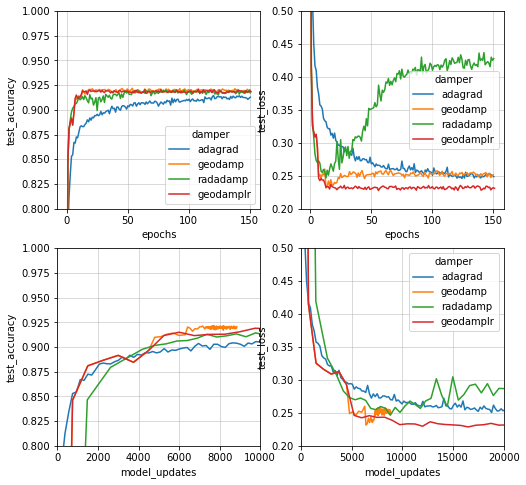

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
w = 8
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(w, w))

for i, x in enumerate(["epochs", "model_updates"]):
    for j, y in enumerate(["test_accuracy", "test_loss"]):
        idx = ~df.damper.isin([])
        show = df[idx].copy()
        show = show[show.epochs <= 150 + 1]
        ax = sns.lineplot(
            data=show,
            x=x,
            y=y,
            hue="damper",
            ax=axs[i][j],
            ci=None,
#             ci="sd",
#             ci=95,
            estimator=np.median,
        )
#         if "model" in x:
#             ax.set_xscale("log", basex=2)
#             ax.set_xlim(2**11, None)
#         if "accuracy" in y:
#             ax.set_ylim(0.85, 0.92)
        if "loss" in y:
            ax.set_ylim(0.2, 0.5)
        if "loss" in y and "updates" in x:
            ax.set_xlim(0, 20_000)
        if "acc" in y:
            ax.set_ylim(0.8,1)
        if "acc" in y and "updates" in x:
            ax.set_xlim(0, 10_000)
        ax.grid(alpha=0.6)
        if "acc" in y and "model" in x:
            ax.legend_.remove()

<ipython-input-11-d2647c9ec9e7>:5: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=2)


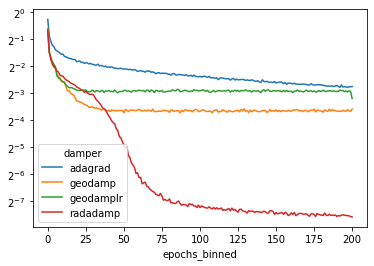

In [11]:
show = df.copy()
show["epochs_binned"] = show["epochs"].astype(int)
show = show.pivot_table(index="epochs_binned", columns="damper", values="batch_loss", aggfunc="mean")
ax = show.plot()
ax.set_yscale("log", basey=2)

<ipython-input-12-99b8b51a193e>:5: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=2)


(0.0, 20000.0)

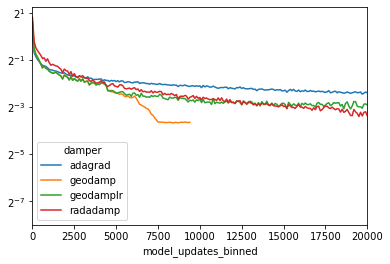

In [12]:
show = df.copy()
show["model_updates_binned"] = (show["model_updates"]/100).astype(int)*100
show = show.pivot_table(index="model_updates_binned", columns="damper", values="batch_loss", aggfunc="mean")
ax = show.plot()
ax.set_yscale("log", basey=2)
ax.set_xlim(0, 20000)